<a href="https://colab.research.google.com/github/rishabhk0/Rishabh_ML_AI/blob/main/Linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import sys
assert sys.version_info >=(3,7)

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn

In [4]:
from google.colab import files
uploaded = files.upload()

Saving housing.csv to housing.csv


In [6]:
data = pd.read_csv("housing.csv")

In [7]:
data.head()

,id,price,area,bedrooms,bathrooms,stories,stories.1,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,0,13300000,7420,4,2,3,1,0,0,0,1,2,1,1.0
1,1,12250000,8960,4,4,4,1,0,0,0,1,3,0,1.0
2,2,12250000,9960,3,2,2,1,0,1,0,0,2,1,0.5
3,3,12215000,7500,4,2,2,1,0,1,0,1,3,1,1.0
4,4,11410000,7420,4,1,2,1,1,1,0,1,2,0,1.0


In [8]:
data.describe()

,id,price,area,bedrooms,bathrooms,stories,stories.1,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
count,545.00000,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000
mean,272.00000,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.858716,0.177982,0.350459,0.045872,0.315596,0.693578,0.234862,0.465138
std,157.47222,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.348635,0.382849,0.477552,0.209399,0.465180,0.861586,0.424302,0.380686
min,0.00000,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,136.00000,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,272.00000,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000
75%,408.00000,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000
max,544.00000,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000,1.000000,1.000000


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                545 non-null    int64  
 1   price             545 non-null    int64  
 2   area              545 non-null    int64  
 3   bedrooms          545 non-null    int64  
 4   bathrooms         545 non-null    int64  
 5   stories           545 non-null    int64  
 6   stories.1         545 non-null    int64  
 7   guestroom         545 non-null    int64  
 8   basement          545 non-null    int64  
 9   hotwaterheating   545 non-null    int64  
 10  airconditioning   545 non-null    int64  
 11  parking           545 non-null    int64  
 12  prefarea          545 non-null    int64  
 13  furnishingstatus  545 non-null    float64
dtypes: float64(1), int64(13)
memory usage: 59.7 KB


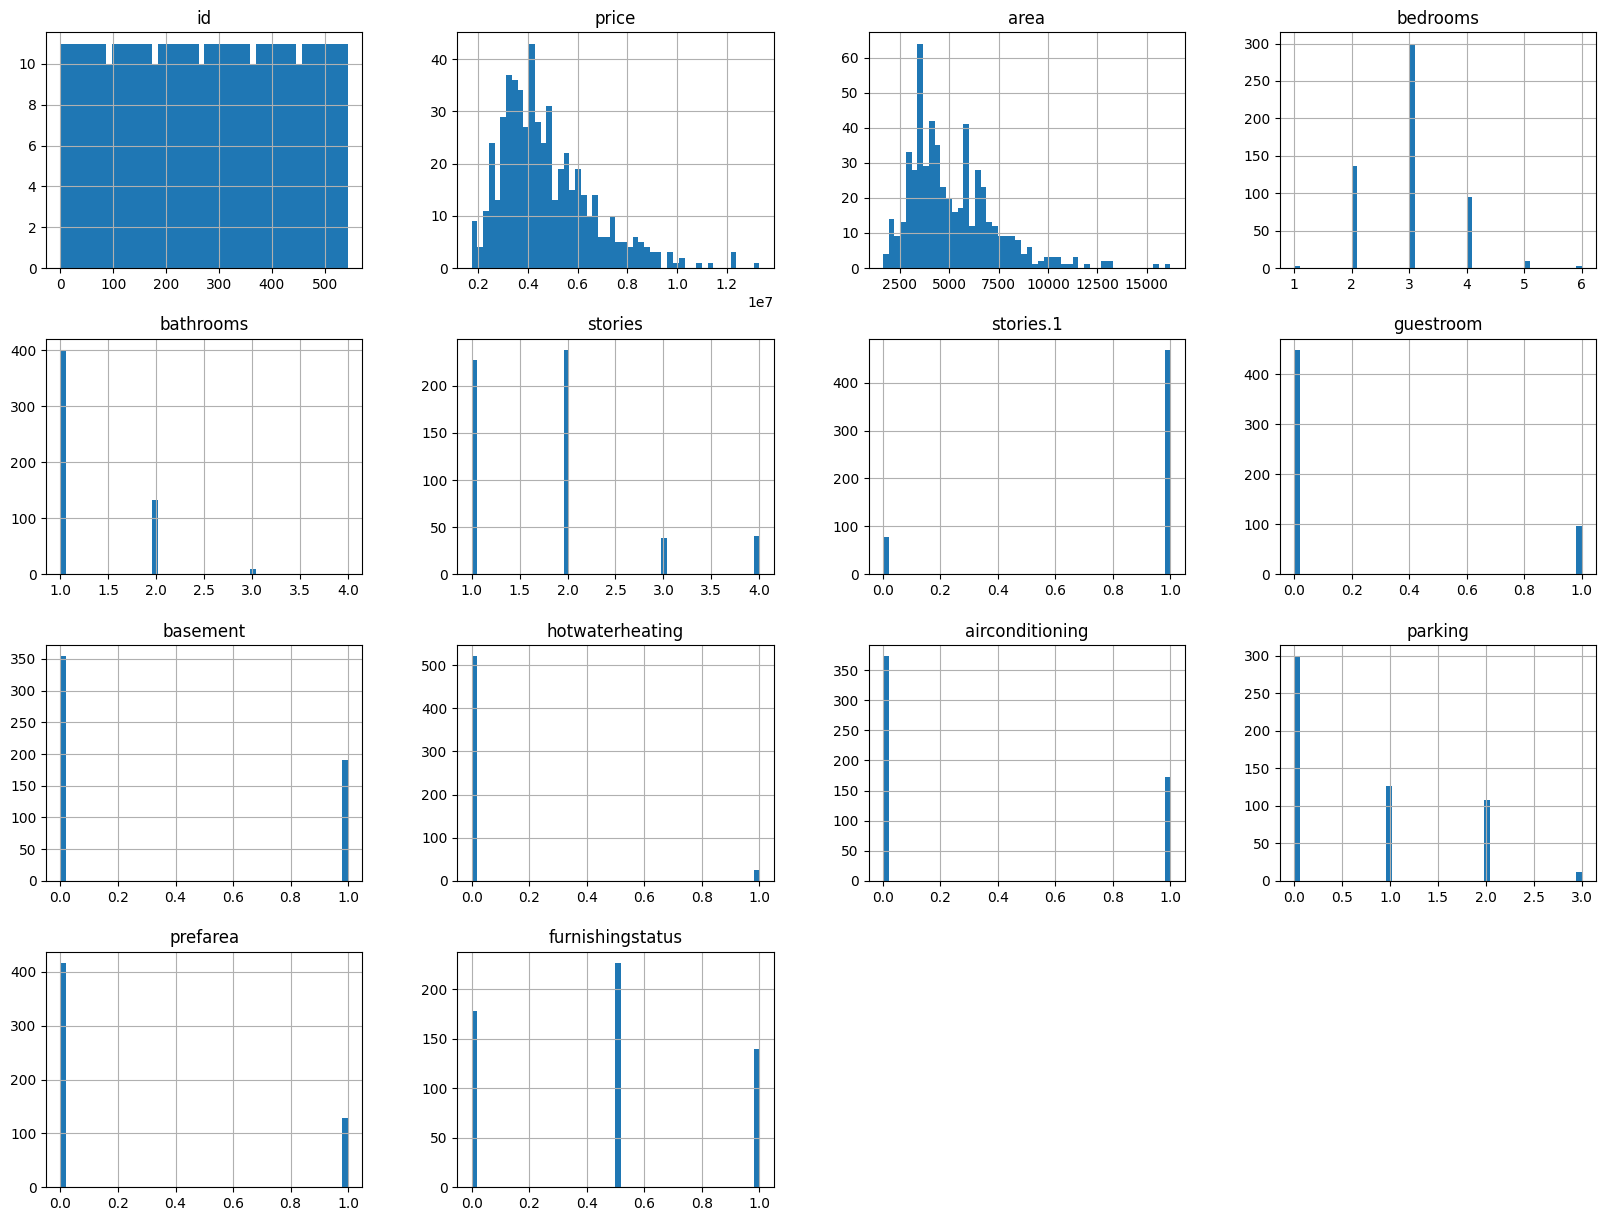

In [10]:
data.hist(bins=50, figsize=(20,15))
plt.show()

In [11]:
X = data.drop('price', axis=1)
y = data['price']

In [12]:
np.random.seed(42)

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size= 0.2, random_state=42)

In [14]:
len(X_test)

109

In [15]:
len(X_train)

436

In [16]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 109 entries, 316 to 155
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                109 non-null    int64  
 1   area              109 non-null    int64  
 2   bedrooms          109 non-null    int64  
 3   bathrooms         109 non-null    int64  
 4   stories           109 non-null    int64  
 5   stories.1         109 non-null    int64  
 6   guestroom         109 non-null    int64  
 7   basement          109 non-null    int64  
 8   hotwaterheating   109 non-null    int64  
 9   airconditioning   109 non-null    int64  
 10  parking           109 non-null    int64  
 11  prefarea          109 non-null    int64  
 12  furnishingstatus  109 non-null    float64
dtypes: float64(1), int64(12)
memory usage: 11.9 KB


In [17]:
np.random.seed(42)

In [18]:
X_test.head()

,id,area,bedrooms,bathrooms,stories,stories.1,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
316,316,5900,4,2,2,0,0,1,0,0,1,0,0.0
77,77,6500,3,2,3,1,0,0,0,1,0,1,1.0
360,360,4040,2,1,1,1,0,0,0,0,0,0,0.5
90,90,5000,3,1,2,1,0,0,0,1,0,0,0.5
493,493,3960,3,1,1,1,0,0,0,0,0,0,1.0


In [19]:
from sklearn.utils import shuffle
X_train, y_train = shuffle(X_train, y_train, random_state=42)
X_test, y_test = shuffle(X_test, y_test, random_state=42)

In [20]:
X_test.head()

,id,area,bedrooms,bathrooms,stories,stories.1,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
68,68,6000,3,1,1,1,0,0,0,1,1,0,1.0
6,6,8580,4,3,4,1,0,0,0,1,2,1,0.5
493,493,3960,3,1,1,1,0,0,0,0,0,0,1.0
537,537,1700,3,1,2,1,0,0,0,0,0,0,0.0
245,245,5360,3,1,2,1,0,0,0,0,2,1,0.0


In [21]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score

In [22]:
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [23]:
y_prediction= model.predict(X_test)

In [24]:
print(y_prediction)

[6637505.57381993 8528431.90977453 2273077.56728105 1884117.35839286
 5124021.08392845 5301361.09242887 6994948.72167159 4902340.20179457
 5912417.8184528  2287030.17560666 2351233.56536842 7438199.7496313
 4658263.85126968 4355073.7927586  2648959.30586942 4018025.71051615
 7873933.57035961 3866950.29027171 7175484.62403332 7119469.96093766
 3242443.51917211 5170494.7363008  6619712.02505909 2458022.34766398
 1887027.96068752 3363400.96923551 5863259.67501635 5095188.8319989
 3128432.61593703 2796872.26785892 8022330.68426719 4425037.00286892
 2983277.34341527 2534632.64437884 1873168.55929929 6637146.35743727
 7659106.41778797 5827209.538749   5098795.775266   4179662.54791455
 5408742.30675153 2391594.5672508  4897006.92902718 2272084.41009526
 6315485.11454373 2986978.93138023 5229390.60231339 5068918.7447866
 5264693.0695424  7054406.12404798 7104153.07871925 5527666.24578732
 2439877.85363414 8071902.03681456 5555124.93218434 7908268.57690709
 2229277.11677719 7569958.86798915 20

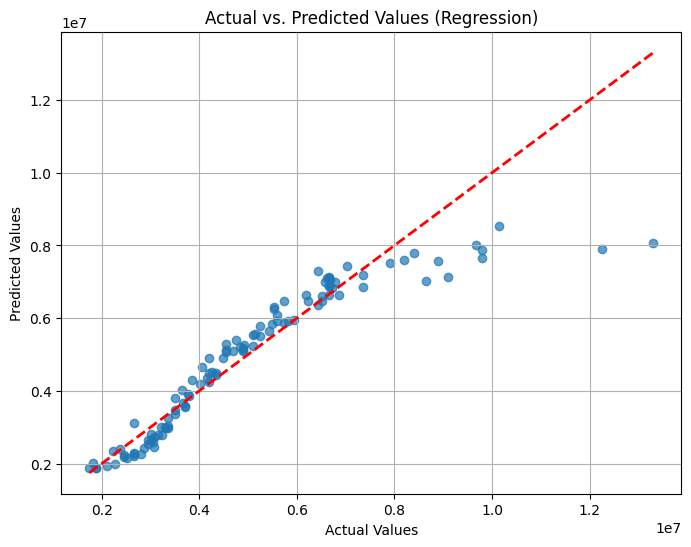

In [31]:
    plt.figure(figsize=(8, 6))
    plt.scatter(y_test, y_prediction, alpha=0.7)
    plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--', lw=2) # Diagonal line
    plt.xlabel("Actual Values")
    plt.ylabel("Predicted Values")
    plt.title("Actual vs. Predicted Values (Regression)")
    plt.grid(True)
    plt.show()

In [32]:
mse = mean_squared_error(y_test,y_prediction)
rmse = np.sqrt(mse)

In [33]:
print(mse)

753837202332.1792


In [34]:
print(rmse)

868237.9871510917


In [35]:
print("X_train shape :", X_train.shape)
print("y_train shape:", y_train.shape)

X_train shape : (436, 13)
y_train shape: (436,)


In [36]:
X_train.head()

,id,area,bedrooms,bathrooms,stories,stories.1,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
328,328,4500,3,2,2,0,0,1,0,1,0,0,0.5
502,502,3480,2,1,1,1,0,0,0,0,1,0,0.5
351,351,3600,2,1,1,1,0,0,0,0,0,0,0.5
406,406,5320,2,1,1,1,0,0,0,0,1,1,0.0
128,128,5500,3,1,3,1,1,0,0,1,1,0,1.0
